In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Load the data
data = pd.read_csv("PredictiveManteinanceEngineTraining.csv")

# Display shape of the data and Understanding the data
print("Shape of the data:", data.shape)
print("Data columns:", data.columns)
print("Data description:", data.describe())

Shape of the data: (20631, 30)
Data columns: Index(['id', 'cycle', 'setting1', 'setting2', 'setting3', 's1', 's2', 's3',
       's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14',
       's15', 's16', 's17', 's18', 's19', 's20', 's21', 'RUL', 'label1',
       'label2', 'cycle_norm'],
      dtype='object')
Data description:                  id         cycle      setting1      setting2  setting3  \
count  20631.000000  20631.000000  20631.000000  20631.000000   20631.0   
mean      51.506568    108.807862      0.499490      0.501959       0.0   
std       29.227633     68.880990      0.125708      0.244218       0.0   
min        1.000000      1.000000      0.000000      0.000000       0.0   
25%       26.000000     52.000000      0.413793      0.333333       0.0   
50%       52.000000    104.000000      0.500000      0.500000       0.0   
75%       77.000000    156.000000      0.586207      0.750000       0.0   
max      100.000000    362.000000      1.000000      1.0

In [ ]:
# Data Cleaning

# Remove columns with all zero values
data = data.loc[:, (data != 0).any(axis=0)]

# Calculate the threshold for 30% zero or null values
threshold = len(data) * 0.3


In [ ]:

# Fill numerical columns with median and categorical columns with mode where less than 30% values are zero or null
for col in data.columns:
    if data[col].dtype == 'object':
        mode_val = data[col].mode()[0]
        data[col].fillna(mode_val, inplace=True)
    else:
        if data[col].isnull().sum() > threshold:
            data.drop(col, axis=1, inplace=True)
        else:
            median_val = data[col].median()
            data[col].fillna(median_val, inplace=True)

# Display the shape of the cleaned data
print("Shape of cleaned data:", data.shape)

# Display the first few rows of the cleaned data
print("\nFirst few rows of cleaned data:")
data.head()


Shape of cleaned data: (20631, 23)

First few rows of cleaned data:


<ipython-input-4-7436d095d816>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col].fillna(median_val, inplace=True)
<ipython-input-4-7436d095d816>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col].fillna(median_val, inplace=True)
<ipython-input-4-7436d095d816>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col].fillna(median_val, inplace=True)
<ipython-input-4-7436d095d816>:11: SettingWithCopyWarning: 
A value

,id,cycle,setting1,setting2,s2,s3,s4,s6,s7,s8,...,s13,s14,s15,s17,s20,s21,RUL,label1,label2,cycle_norm
0,1,1,0.459770,0.166667,0.183735,0.406802,0.309757,1.0,0.726248,0.242424,...,0.205882,0.199608,0.363986,0.333333,0.713178,0.724662,191,0,0,0.00000
1,1,2,0.609195,0.250000,0.283133,0.453019,0.352633,1.0,0.628019,0.212121,...,0.279412,0.162813,0.411312,0.333333,0.666667,0.731014,190,0,0,0.00277
2,1,3,0.252874,0.750000,0.343373,0.369523,0.370527,1.0,0.710145,0.272727,...,0.220588,0.171793,0.357445,0.166667,0.627907,0.621375,189,0,0,0.00554
3,1,4,0.540230,0.500000,0.343373,0.256159,0.331195,1.0,0.740741,0.318182,...,0.294118,0.174889,0.166603,0.333333,0.573643,0.662386,188,0,0,0.00831
4,1,5,0.390805,0.333333,0.349398,0.257467,0.404625,1.0,0.668277,0.242424,...,0.235294,0.174734,0.402078,0.416667,0.589147,0.704502,187,0,0,0.01108


In [ ]:

# Calculate Pearson correlation coefficients between 'RUL' and each numerical feature column
correlation = data[['cycle', 'setting1', 'setting2', 's2', 's3', 's4', 's6', 's7', 's8', 's9', 's11', 's12', 's13', 's14', 's15', 's17', 's20', 's21', 'RUL']].corr()['RUL'].abs()

# Sort the correlation values in descending order
correlation = correlation.sort_values(ascending=False)

# Select the top correlated columns (excluding 'RUL' itself)
top_correlated_columns = correlation.index[1:6]  # Select top 5 correlated columns excluding 'RUL'

# Print the top correlated columns
print("Top correlated columns with 'RUL':", top_correlated_columns)


Top correlated columns with 'RUL': Index(['cycle', 's11', 's4', 's12', 's7'], dtype='object')


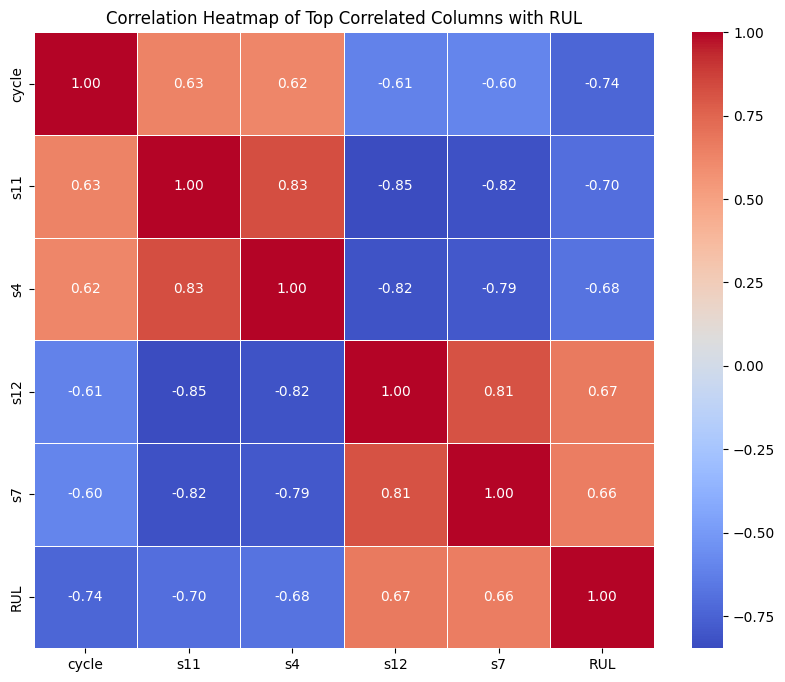

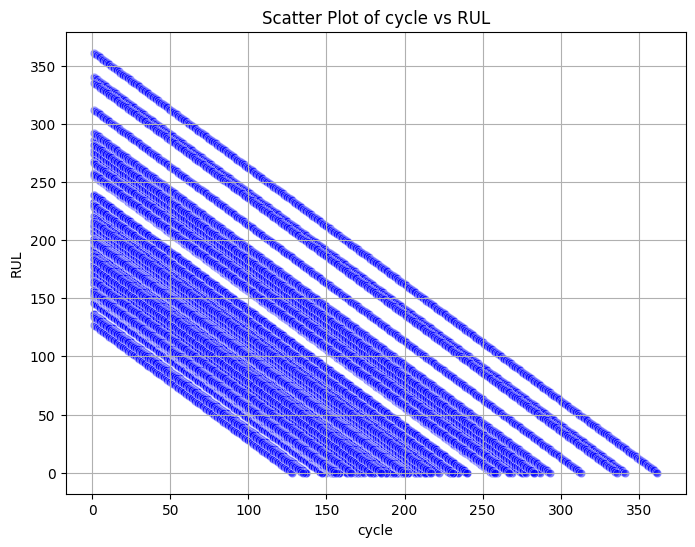

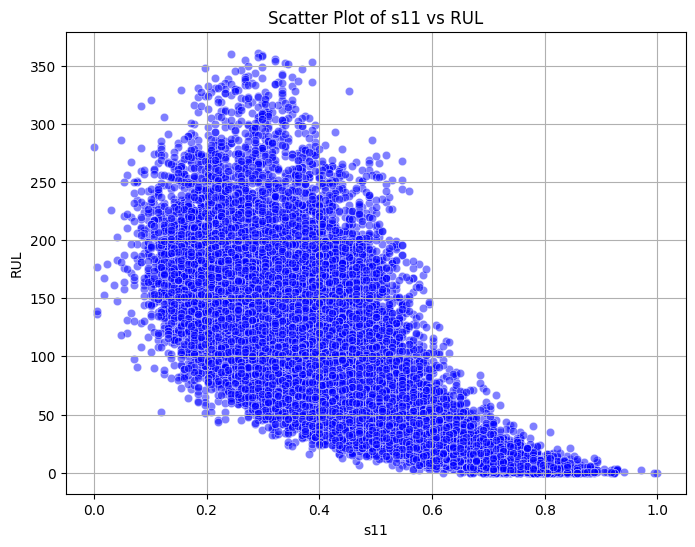

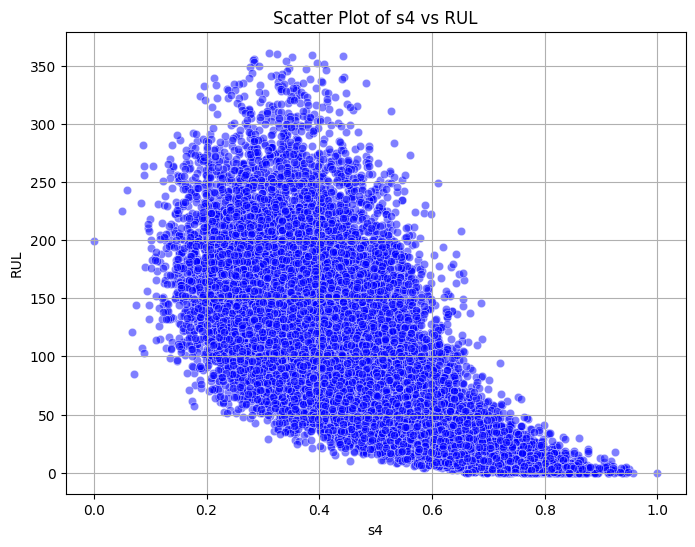

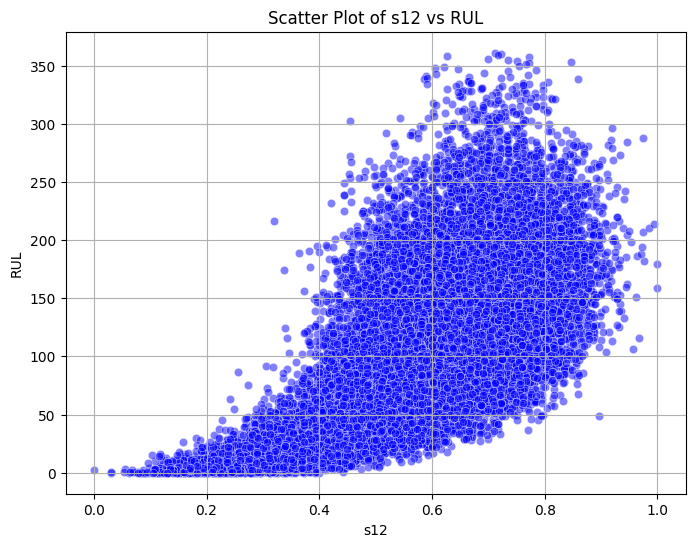

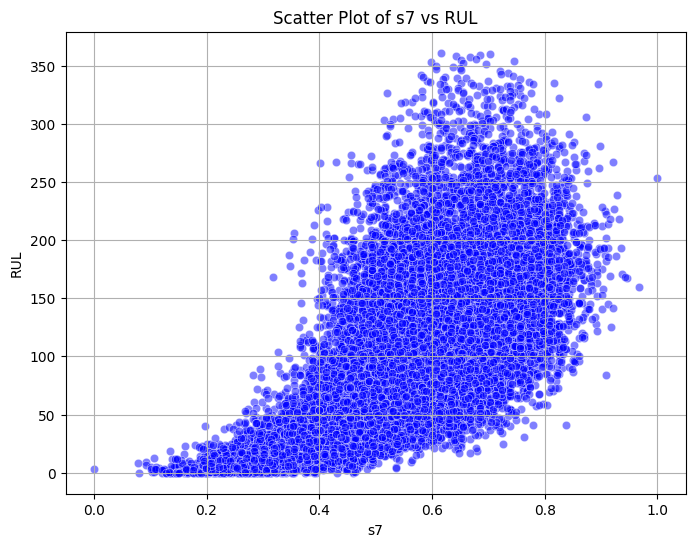

In [ ]:


# Select the top correlated columns
top_correlated_columns = ['cycle', 's11', 's4', 's12', 's7']

# Create a heatmap for correlation matrix of the top correlated columns
plt.figure(figsize=(10, 8))
correlation_matrix = data[top_correlated_columns + ['RUL']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Top Correlated Columns with RUL')
plt.show()

# Create scatter plots for each top correlated column against 'RUL'
for column in top_correlated_columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=data[column], y=data['RUL'], color='blue', alpha=0.5)
    plt.title(f'Scatter Plot of {column} vs RUL')
    plt.xlabel(column)
    plt.ylabel('RUL')
    plt.grid(True)
    plt.show()


SLR TRIAL 1

Coefficients: [-302.25446375]
Intercept: 232.22240310305125
Mean squared error: 2369.75
R-squared score: 0.48


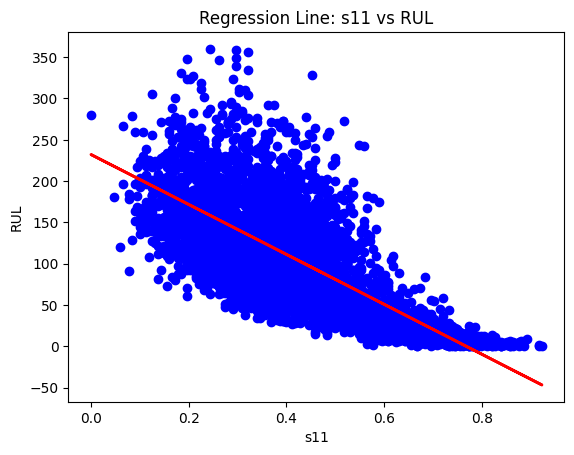

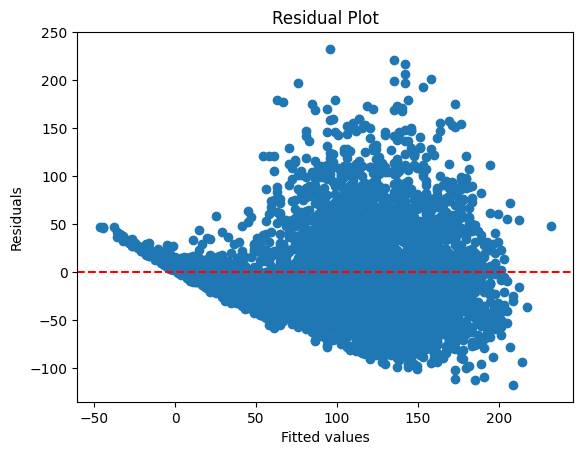

In [ ]:
# Simple Linear Regression
# Let's choose 's11' as our feature and 'RUL' as our target variable
X = data[['s11']]
y = data['RUL']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a linear regression model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Coefficients
print('Coefficients:', model.coef_)

# Intercept
print('Intercept:', model.intercept_)

# Mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

# R-squared score
print('R-squared score: %.2f' % r2_score(y_test, y_pred))

# Plotting regression line
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.title('Regression Line: s11 vs RUL')
plt.xlabel('s11')
plt.ylabel('RUL')
plt.show()

# Assumptions of Linear Regression
# 1. Linearity: Check by plotting scatter plots
# 2. Independence: Ensure observations are independent
# 3. Homoscedasticity: Check by plotting residuals vs. fitted values
# 4. Normality of residuals: Check by plotting histogram or QQ plot of residuals

# Hypothesis Testing
# Perform t-tests or F-tests to test significance of coefficients

# Linear Regression using Sklearn
# You already implemented it above.

# Residual Analysis
# Analyze residuals for homoscedasticity, normality, and independence
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.title('Residual Plot')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Transform features to include polynomial terms up to degree 2
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Split transformed data into training and testing sets
X_poly_train, X_poly_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Create a new linear regression model
model_poly = LinearRegression()

# Train the model
model_poly.fit(X_poly_train, y_train)

# Make predictions
y_pred_poly = model_poly.predict(X_poly_test)

# Evaluate the model
print('R-squared score (Polynomial Regression): %.2f' % r2_score(y_test, y_pred_poly))


R-squared score (Polynomial Regression): 0.48


SLR TRIAL 2

Coefficients: [296.34452039]
Intercept: -63.956844715335905
Mean squared error: 2611.45
R-squared score: 0.43


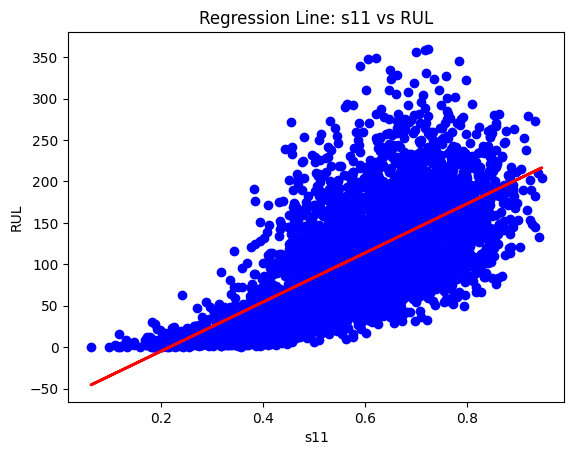

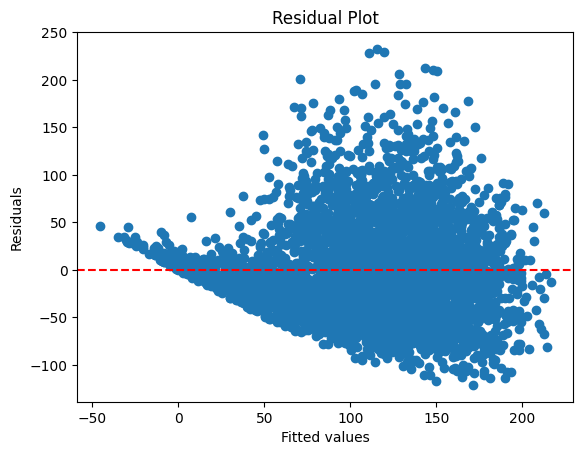

In [ ]:
# Simple Linear Regression
# Let's choose 's12' as our feature and 'RUL' as our target variable
X = data[['s12']]
y = data['RUL']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a linear regression model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Coefficients
print('Coefficients:', model.coef_)

# Intercept
print('Intercept:', model.intercept_)

# Mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

# R-squared score
print('R-squared score: %.2f' % r2_score(y_test, y_pred))

# Plotting regression line
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.title('Regression Line: s11 vs RUL')
plt.xlabel('s11')
plt.ylabel('RUL')
plt.show()

# Assumptions of Linear Regression
# 1. Linearity: Check by plotting scatter plots
# 2. Independence: Ensure observations are independent
# 3. Homoscedasticity: Check by plotting residuals vs. fitted values
# 4. Normality of residuals: Check by plotting histogram or QQ plot of residuals

# Hypothesis Testing
# Perform t-tests or F-tests to test significance of coefficients

# Linear Regression using Sklearn
# You already implemented it above.

# Residual Analysis
# Analyze residuals for homoscedasticity, normality, and independence
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.title('Residual Plot')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()


from slr we are gettingf the R-squared value less .75 which  indicates that the linear regression model might not be capturing enough of the variance in the data.
  

MLR TRIAL 1

R-squared score: 0.5592254146648352
Mean squared error: 2013.8087765590221


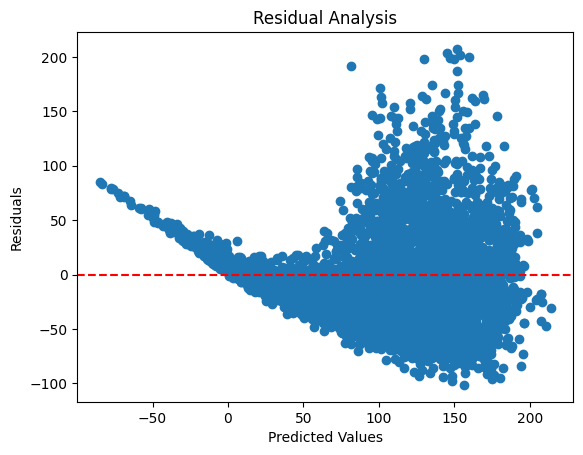

In [ ]:

# Selecting features and target variable
X = data.drop(['RUL', 'id'], axis=1)  # Excluding 'id' as it's not a predictor variable
y = data['RUL']

# Dealing with categorical variables (if any)
X = pd.get_dummies(X)  # One-hot encode categorical variables if present

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building the model
model = LinearRegression()

# Variable selection using RFE
rfe = RFE(model, n_features_to_select=5)  # Select top 5 features
rfe.fit(X_train, y_train)

# Get selected features
selected_features = X.columns[rfe.support_]
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Training the model with selected features
model.fit(X_train_selected, y_train)

# Making predictions
y_pred = model.predict(X_test_selected)

# Model evaluation
print('R-squared score:', r2_score(y_test, y_pred))
print('Mean squared error:', mean_squared_error(y_test, y_pred))

# Residual analysis and predictions
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Analysis')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()


MLR TRIAL 2

In [ ]:
# Select features and target variable
X = data.drop(['RUL', 'id', 'label1', 'label2'], axis=1)  # Excluding 'id', 'label1', 'label2' as they are not predictor variables
y = data['RUL']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R-squared Score:', r2)


Mean Squared Error: 1576.3317161165226
R-squared Score: 0.654978681884017


Here we are getting the highest value R-squared score  is .65 which are not enough for defining the variance

Now we will use Polynomial Features to improve the R-squred value

In [ ]:
# Select features and target variable
X = data.drop(['RUL', 'id', 'label1', 'label2'], axis=1)  # Excluding 'id', 'label1', 'label2' as they are not predictor variables
y = data['RUL']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Polynomial Features
poly = PolynomialFeatures(degree=2)  # You can adjust the degree as needed
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Build the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train_poly, y_train)

# Make predictions
y_pred = model.predict(X_test_poly)

# Evaluate the model
r2 = r2_score(y_test, y_pred)

print('R-squared Score (with Polynomial Features):', r2)


R-squared Score (with Polynomial Features): 0.7155636103402112


Now we will use  with Interaction Terms to improve R-squared Score

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Select features and target variable
X = data.drop(['RUL', 'id', 'label1', 'label2'], axis=1)  # Excluding 'id', 'label1', 'label2' as they are not predictor variables
y = data['RUL']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create interaction terms between pairs of features
interaction = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_interaction = interaction.fit_transform(X_train)
X_test_interaction = interaction.transform(X_test)

# Build the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train_interaction, y_train)

# Make predictions
y_pred = model.predict(X_test_interaction)

# Evaluate the model
r2 = r2_score(y_test, y_pred)

print('R-squared Score (with Interaction Terms):', r2)


R-squared Score (with Interaction Terms): 0.7157621264932142


Now we will use Recursive Feature Elimination to improve R-squared Score

In [ ]:
from sklearn.feature_selection import RFE

# Select features and target variable
X = data.drop(['RUL', 'id', 'label1', 'label2'], axis=1)  # Excluding 'id', 'label1', 'label2' as they are not predictor variables
y = data['RUL']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the linear regression model
model = LinearRegression()

# Perform recursive feature elimination
rfe = RFE(model, n_features_to_select=10)  # Select top 10 features
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)

# Train the model
model.fit(X_train_rfe, y_train)

# Make predictions
y_pred = model.predict(X_test_rfe)

# Evaluate the model
r2 = r2_score(y_test, y_pred)

print('R-squared Score (with Recursive Feature Elimination):', r2)


R-squared Score (with Recursive Feature Elimination): 0.5681562021561284


**we get the highest value of R-squared by using the Polynomial Features and intreaction term feature which is 0.7157**

---



ask.., value needed more than .75?

Logistic Regression

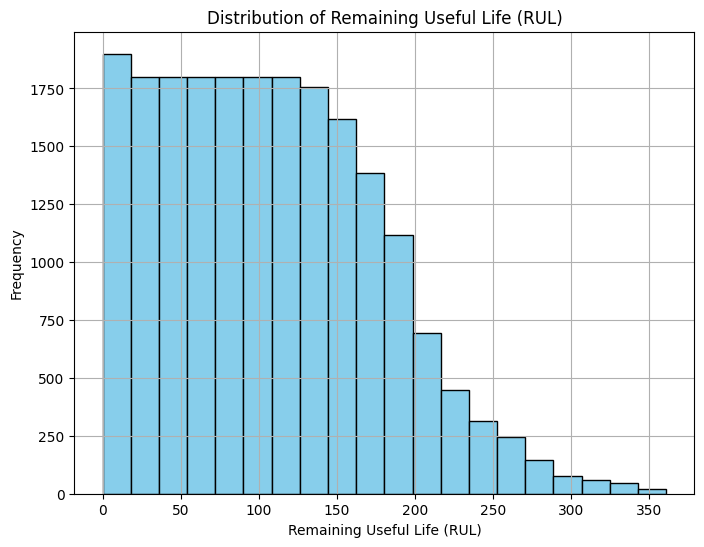

Summary statistics of 'RUL' column:
count    20631.000000
mean       107.807862
std         68.880990
min          0.000000
25%         51.000000
50%        103.000000
75%        155.000000
max        361.000000
Name: RUL, dtype: float64
Chosen threshold: 103.0
Median of 'RUL' column: 103.0


In [ ]:
# Plot the histogram of 'RUL' to visualize its distribution

plt.figure(figsize=(8, 6))
plt.hist(data['RUL'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Remaining Useful Life (RUL)')
plt.ylabel('Frequency')
plt.title('Distribution of Remaining Useful Life (RUL)')
plt.grid(True)
plt.show()

# Calculate summary statistics of 'RUL'
rul_stats = data['RUL'].describe()

# Print the summary statistics
print("Summary statistics of 'RUL' column:")
print(rul_stats)

# Based on the distribution and summary statistics, choose a threshold value
# For example, you could choose the median, mean, or a percentile value as the threshold
threshold = data['RUL'].median()
print("Chosen threshold:", threshold)
rul_median = data['RUL'].median()

print("Median of 'RUL' column:", rul_median)


In [ ]:
# Define binary target variable based on the threshold
data['binary_target'] = (data['RUL'] <= threshold).astype(int)

# Select features and target variable
X = data.drop(['RUL', 'binary_target', 'id', 'label1', 'label2', 'cycle_norm'], axis=1)  # Excluding non-predictor columns
y = data['binary_target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:\n', class_report)


Accuracy: 0.8531621032226799
Confusion Matrix:
 [[1854  255]
 [ 351 1667]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86      2109
           1       0.87      0.83      0.85      2018

    accuracy                           0.85      4127
   macro avg       0.85      0.85      0.85      4127
weighted avg       0.85      0.85      0.85      4127



 the accuracy of the model is 85.31%, indicating that the majority of instances were classified correctly.

TO do precision, recall, and F1-score..